# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we explore a data set of movies. This data set contains information about 10,000 movies collected from the Movie Database (**TMDb**). **TMDb movie data** cleaned from original data on [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata).

> We are going to explore and answer two questions:

> 1. Which genres are most popular from year to year?

> 2. What kinds of properties are associated with movies that have high revenue?

In [237]:
# import statements for all of the packages that we plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load in the data, check for and then clean the data, address any missing, and duplicates, and wrong data type.

### General Properties

In [238]:
# load the dataset
df=pd.read_csv('tmdb-movies.csv')

# look at the first 5 rows of data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [239]:
# look at the last 5 rows of data
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


View dimensions of dataframe to see how many 'rows' and 'columns' it has. It shows that the dataframe has **10866 rows** and **21 columns**.

In [240]:
# view dimensions of dataset. 
df.shape

(10866, 21)

In [241]:
# get useful discriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [242]:
# display a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The following columns come with missing values: *imdb_id, cast, homepage, director,tagline, keywords, overview, genres and production_companies* columns. *release_date* column has a wrong *dtype*. It should be in *datetime* format. Also, *dtype* for *budget* and *revenue* columns is *int*, but that for *budget_adj* and *revenue_adj* is *float*. It is better if they all have the same *dtype* which will be taken care of. 

Before we start to clean data, let's drop some of the columns that are specific to the movies and are not needed for this analysis. 

In [243]:
# drop extraneous columns
df.drop(['id','imdb_id','homepage','tagline','overview','keywords'], axis=1, inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


View dimentions of the dataframe again, to see how many columns we have now. it shows we have **15 columns**. 

In [244]:
# view dimensions of the dataframe after droping some columns
df.shape

(10866, 15)

Look at the histogram of numerical columns in dataframe to see how they are distributed. 

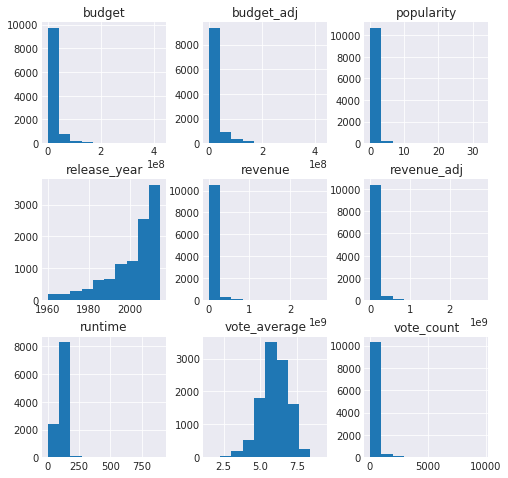

In [245]:
df.hist(figsize=(8,8));
#df['runtime'].hist(figsize=(8,8));
#plt.xlim((0, 300))

Based on the histogram, *vote_average* is the only column of data with a normal distribution. In addition, other columns are all right-skewed except *release_year*, and *runtime* columns.


### Data Cleaning (Deal with null values, duplicates and wrong dtypes, etc.)

Let's first look at some information from the dataframe: 


In [246]:
# look at the some information about the data again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [247]:
# indentify rows with NaN within "cast" column
df_cast_null = df[df.cast.isnull()]

df_revenue_non_zero = df_cast_null[df_cast_null['revenue']!=0]
#percentage of non_zero revenue for the rows having NaN
(df_revenue_non_zero.shape[0]/df_cast_null.shape[0]) * 100

6.578947368421052

In [248]:
df_cast_null.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.0
441,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.0


In [249]:
# indentify rows with NaN within "director" column
df_director_null = df[df.director.isnull()]

df_revenue_non_zero = df_director_null[df_director_null['revenue']!=0]
#percentage of non_zero revenue for the rows having NaN
(df_revenue_non_zero.shape[0]/df_director_null.shape[0]) * 100

2.272727272727273

In [250]:
df_director_null.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.0,0.0
548,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0


In [251]:
# indentify rows with NaN within "genres" column
df_genres_null  = df[df.genres.isnull()] 

df_revenue_non_zero = df_genres_null[df_genres_null['revenue']!=0]
#percentage of non_zero revenue for the rows having NaN
(df_revenue_non_zero.shape[0]/df_genres_null.shape[0]) * 100

0.0

In [252]:
df_genres_null.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,NaN,10/29/15,21,6.1,2015,0.0,0.0
620,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.0,0.0


In [253]:
# indentify rows with NaN within "production_companies" column
df_production_companies_null = df[df.production_companies.isnull()]

df_revenue_non_zero = df_production_companies_null[df_production_companies_null['revenue']!=0]
#percentage of non_zero revenue for the rows having NaN
(df_revenue_non_zero.shape[0]/df_production_companies_null.shape[0]) * 100

9.320388349514563

In [254]:
df_production_companies_null.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,0.584363,0,0,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,0.476341,0,0,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0


We see that there are 4 columns (cast, director, genres and production_companies) that have null values. *dtype* for all of them is a *string*. let's look at them and see if we can drop null values. Since we are concerned high revenue, we check to see how droping rows having null values from those 4 columns would impact our analyses. 
A majority of values for revenue are zero. To be specific, the percentage of non_zero revenue for the rows having null values are less than 10%. Also, the popularity for those rows is very low. As far as our questions concerned, droping the rows with null values would not considerably infulence the accuracy of our analysis. Hence, the rows with null values within *cast, director, genres, and production_companies* are dropped.  



In this part, we drop all null values and then check to see all them are gone.

In [255]:
# drop rows with null values
df.dropna(axis=0, inplace=True)
df.isnull().any()

popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [256]:
# run df.info() to see the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


df.info() shows that the data frame has 9773 rows and 15 columns without any null values.

Checking duplicates in the dataframe. The dataframe has one duplicate. It is dropped now. 

In [257]:
# print number of duplicates in the dataset
sum(df.duplicated())

1

In [258]:
# drop duplicates in dataset
df.drop_duplicates(inplace=True)

In [259]:
sum(df.duplicated())

0

In [260]:
#Fixing the wrong *dtype*. the *dtype* for release_date column is a string.
# It is not right. It should be in datetime format. It is changed to datetime.
df['release_date']=pd.to_datetime(df['release_date'])
# To fix the an issue to display the correct date century
df.loc[df['release_date'].dt.year >= 2020, 'release_date'] -= pd.DateOffset(years=100)


In [261]:
df['release_date'].dtype

dtype('<M8[ns]')

In [262]:
# check to see dtype('<M8[ns]') is the same as dtype('datetime64[ns]') 
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [263]:
#now change the dtype of budget, revenue columns to float 
#in order to have the consistent columns, then run df.info() to see the changes.

df['budget']=df['budget'].astype('float', inplace=True)
df['revenue']=df['revenue'].astype('float', inplace=True)


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9772 non-null float64
budget                  9772 non-null float64
revenue                 9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 1.2+ MB


In [265]:
# View the clean dataframe.
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


By this, we have addressed all the null values and duplicates.*release_date* has the right *dtype* and *bodget* and *revenue* have the same *dtype* as *budget_adj* and *revenue_adj* columns. Hence, the dataset is clean for further analyses. 

<a id='eda'></a>
## Exploratory Data Analysis


### 1) Which genres are most popular from year to year?

In [266]:
df_select=df[['release_year','release_date','original_title','genres','popularity','vote_average']]
df_select.head(1)

,release_year,release_date,original_title,genres,popularity,vote_average
0,2015,2015-06-09,Jurassic World,Action|Adventure|Science Fiction|Thriller,32.985763,6.5


Columns of interests were assigned to a new dataframe called (df_select). *genres* column has several genres that are splitted by pipe "|" but all in one cell for each movie. let's first split all those genres which belongs to a movie and bring them in their own row.

In [267]:
#Explain details:
#    - First, set the columns that are not to be touched as the index(df_select.set_index()).
#    - Next. stack the rows(_.stack()).
#    - We have a series now, so call str.split on pip(_.str.split('|', expand=True))
#    - We need to get rid of NULL values, so call stack again(_.stack()).
#    - Now we want the second last level of the index to become our columns, so unstack using unstack(-2)(unstack on the second last level).
#    - Get rid of the superfluous last level using reset_index(_.reset_index(-1, drop=True)).
#    - And finally,(_.reset_index()).
# Source of code:
# https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe

df_select_split_genres =(df_select.set_index(['release_date','original_title','release_year','popularity','vote_average'])
   .stack()
   .str.split('|', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)

df_select_split_genres.head(2)

,release_date,original_title,release_year,popularity,vote_average,genres
0,1960-01-01,The Brides of Dracula,1960,0.333643,6.6,Horror
1,1960-01-01,The Unforgiven,1960,0.421043,4.9,Action


First, let see the most popular genres during all years(from *1960* to *2015*).

We found that the three most popular genres during all years were **Drama, Comedy**, and **Action**.

genres
Drama              2731.333255
Comedy             2168.162456
Action             2164.052715
Thriller           2120.385441
Adventure          1673.329036
Science Fiction    1210.155764
Crime               996.770934
Romance             984.669716
Family              926.881471
Fantasy             887.300733
Horror              732.795567
Animation           564.111643
Mystery             551.609983
War                 194.216473
Music               186.749755
History             186.506870
Western              96.728674
Documentary          68.842029
TV Movie             39.053984
Foreign              25.126097
Name: popularity, dtype: float64

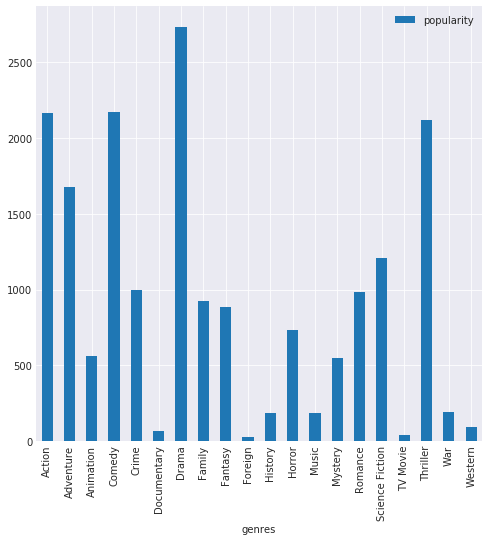

In [268]:
popular_genres_totals=df_select_split_genres.groupby('genres')['popularity'].sum()
df_popular_genres_totals=pd.DataFrame(popular_genres_totals)
df_popular_genres_totals.plot(kind='bar', figsize=(8,8));
popular_genres_totals.sort_values(ascending=False)

To find **the most popular** genres from **year to year**: 

In [269]:
#create a list of years.It shows that our years are from 1960 to 2015.
year=df_select_split_genres['release_year'].unique()
years=year.tolist()
#years

In [270]:
popular_genres_year = df_select_split_genres.groupby(['release_year','genres'])['popularity'].sum()
df_popular_genres_year=pd.DataFrame(popular_genres_year)
popular_genres_year_sorted=df_popular_genres_year.groupby(['release_year']).apply(lambda x: x.sort_values(['popularity'], ascending=False))
popular_genres_year_sorted
                                                                                  


popularity
release_year release_year genres                     
1960         1960         Drama              7.361967
                          Thriller           4.871460
                          Action             4.725796
                          Horror             4.140147
                          Adventure          3.504904
                          Western            3.406554
                          Romance            3.247365
                          Comedy             3.168003
                          History            2.061821
                          Science Fiction    0.983714
                          Fantasy            0.856495
                          Family             0.834191
                          Crime              0.692959
                          War                0.451727
                          Music              0.423531
                          Foreign            0.194948
1961         1961         Drama              6.915731
                          Comedy             6.798382
                          Adventure          4.603938
                          Family             3.584113
                          Romance            2.982255
                          Animation          2.631987
                          Action             2.561389
                          Crime              1.613038
                          Music              1.129497
                          War                1.062368
                          History            1.003389
                          Science Fiction    0.901915
                          Horror             0.763733
                          Mystery            0.712793
...                                               ...
2014         2014         Romance           51.462767
                          Horror            49.480621
                          Family            47.203418
                          Animation         40.112645
                          Mystery           36.364456
                          War               33.927923
                          Music             17.873230
                          History           16.031545
                          Documentary        8.397088
                          Western            3.877174
                          TV Movie           3.555117
2015         2015         Action           240.262635
                          Drama            239.150532
                          Thriller         237.857370
                          Adventure        225.546601
                          Science Fiction  192.567306
                          Comedy           148.801833
                          Crime             86.753368
                          Family            59.356583
                          Horror            57.906110
                          Fantasy           57.291434
                          Romance           52.144194
                          Mystery           50.497379
                          Animation         44.235481
                          Music             20.477950
                          Western           19.072777
                          History           14.772680
                          War               11.508383
                          Documentary        8.176218
                          TV Movie           3.645720

[1042 rows x 1 columns]

For instance,let see which genres are most popular in *1960* and in *2000*.

It shows that in *1960*, **Drama, Thriller** and **Action** are first three most popular genres.

In [271]:
# To see the most popular genres for  a specific year, we pass the year in .loc[]
popular_genres_year_sorted.loc[1960]

popularity
release_year genres                     
1960         Drama              7.361967
             Thriller           4.871460
             Action             4.725796
             Horror             4.140147
             Adventure          3.504904
             Western            3.406554
             Romance            3.247365
             Comedy             3.168003
             History            2.061821
             Science Fiction    0.983714
             Fantasy            0.856495
             Family             0.834191
             Crime              0.692959
             War                0.451727
             Music              0.423531
             Foreign            0.194948

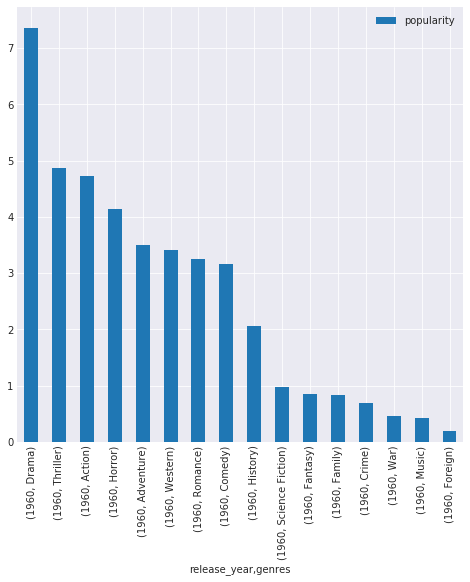

In [272]:
popular_genres_year_sorted.loc[1960].plot(kind='bar', figsize=(8,8));

It shows that in *2000*, **Comedy,Drama** and **Thriller** are first three most popular genres.

In [273]:
popular_genres_year_sorted.loc[2000]

popularity
release_year genres                     
2000         Comedy            48.289951
             Drama             46.209701
             Thriller          36.926983
             Action            30.686966
             Adventure         22.419291
             Crime             20.013484
             Romance           19.193179
             Family            18.948474
             Fantasy           15.019954
             Animation         13.735658
             Science Fiction   13.714199
             Mystery            8.661206
             Horror             7.596542
             Music              4.491834
             War                3.638420
             History            2.601286
             Western            0.854747
             Foreign            0.438210
             Documentary        0.392384
             TV Movie           0.132870

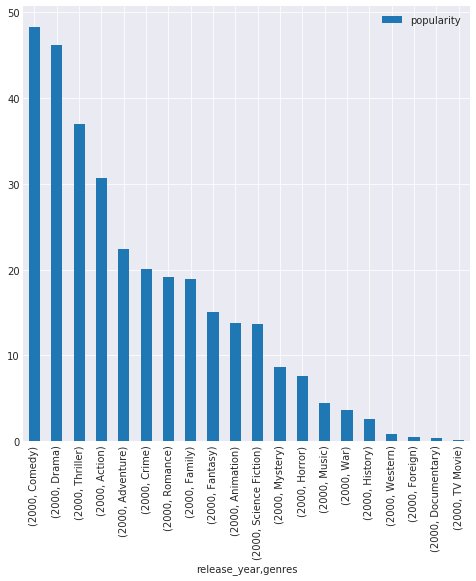

In [274]:
popular_genres_year_sorted.loc[2000].plot(kind='bar', figsize=(8,8));

### 2) What kind of properties are associated with movies that have high revenues?

In [275]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


As it is seen, dataframe has two columns for revenue (revenue, revenue_adj) and budget (budget, budget_adj).

The final two columns ending with "_adj" show the budjet and revenue of the associated movie in terms of *2010* dollars, accounting for inflation over time. Taking into account the impact of inflation must represent a more accurate value. Hence, I do exploration around revenue_adj.

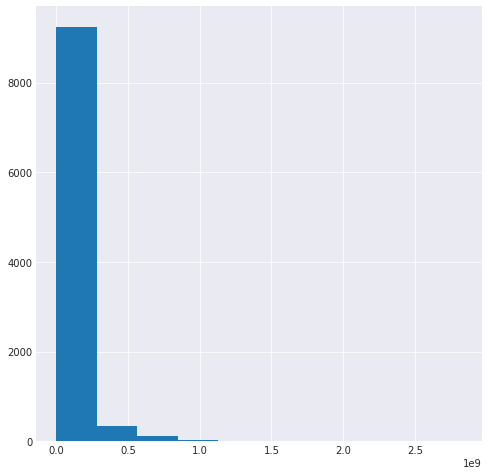

In [276]:
df['revenue_adj'].hist(figsize=(8,8));


The histogram shows that *revenue_adj* is not distributed normally. More that *8000* movies have revenue between *0.0* and *0.5e9*. Based on the metadata from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata), there is no confirmed information that the revenue is in USD. That was the reason we didn't add any unit to the data. 

In [277]:
df['revenue_adj'].describe()

count    9.772000e+03
mean     5.705309e+07
std      1.514499e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.311848e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

We see that at least 50% of data from *revenue_adj* column is equal to zero. 

df.describe() for revenue_adj shows that at least *50%* of revenues are equal to *0.0* and *25%* of revenues are 4.311848e+07* or more.

*Median* was chosen to divide *revenue_adj* into high and low revenue portions/dataframes.

In [278]:
revenue_adj_median = df['revenue_adj'].median()
revenue_adj_median

0.0

In [279]:
low_revenue=df.query('revenue_adj <= revenue_adj.median()')
high_revenue=df.query('revenue_adj > revenue_adj.median()')
num_samples = df.shape[0]
num_samples == low_revenue['original_title'].count() + high_revenue['original_title'].count()

True

In [280]:
high_revenue.shape, low_revenue.shape

((4750, 15), (5022, 15))

Shapes of dataframes show that the number of movies in *low_revenue* df are more than the ones in *high_revenue* df.

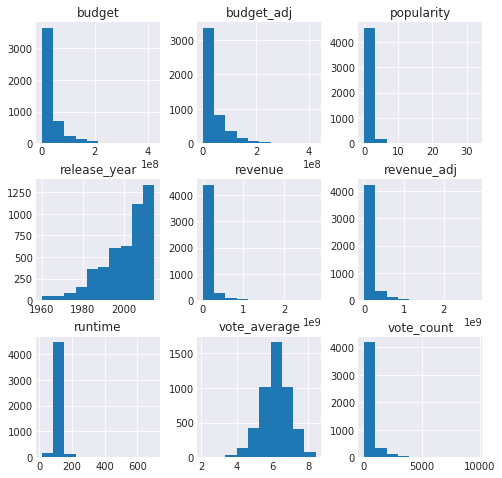

In [281]:
high_revenue.hist(figsize=(8,8));

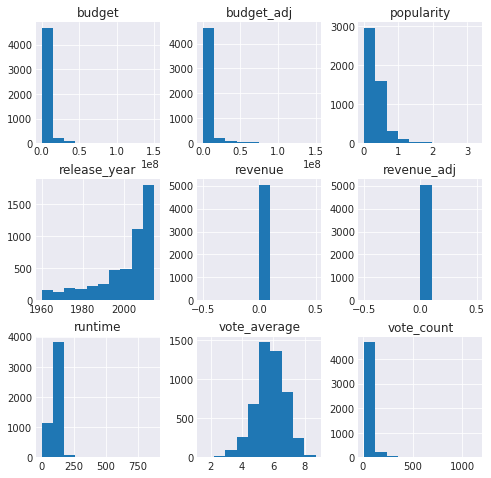

In [282]:
low_revenue.hist(figsize=(8,8));

In [283]:
high_revenue['vote_average'].mean(), low_revenue['vote_average'].mean()

(6.15077894736842, 5.7864197530864194)

Comparing *vote_average, popularity* and *budjet_adj* columns between two low and high revenure dataframes.
The means are higher in *high_revenue* dataframe compared to those from the *low_revenue* dataframe.

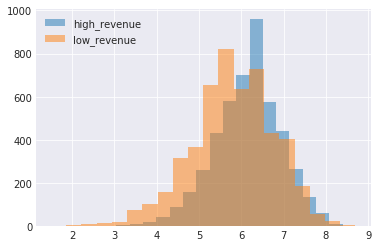

In [284]:
high_revenue['vote_average'].hist(alpha=0.5, bins=20, label='high_revenue')
low_revenue['vote_average'].hist(alpha=0.5, bins=20, label='low_revenue')
plt.legend();

*vote_average* has an approximately normal distribution in both dataframe.

In [285]:
high_revenue['popularity'].mean(), low_revenue['popularity'].mean()

(1.0619151781052631, 0.34741452170450016)

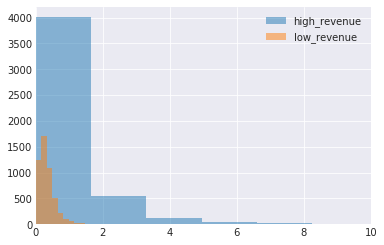

In [286]:
high_revenue['popularity'].hist(alpha=0.5, bins=20, label='high_revenue')
low_revenue['popularity'].hist(alpha=0.5, bins=20, label='low_revenue')
plt.xlim((0, 10))
plt.legend();

Both means and the histograms show that the high-revenue movies are much more popular than low-revenue movies. 

In [287]:
high_revenue['budget_adj'].mean(), low_revenue['budget_adj'].mean()

(35822885.671504289, 3897720.2676033392)

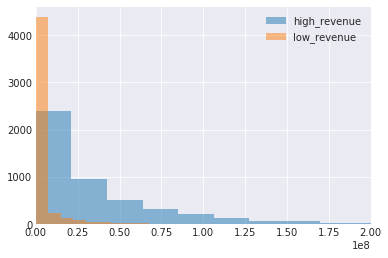

In [288]:
high_revenue['budget_adj'].hist(alpha=0.5, bins=20, label='high_revenue')
low_revenue['budget_adj'].hist(alpha=0.5, bins=20, label='low_revenue')
plt.xlim((0, 2e8))
plt.legend();

Mean of budget is much higher in the high-revenue movies compared to that for the low-revenue movies. 

**Exploring in high_revenue dataframe and findging association between revenue_adj and other properties.**

First, let's explore which movie has the max of the *revenue_adj*. It shows that *'Avator'* movie that is directed by *James Cameron* has the maximum revenue.This movie was one of the Highest-Grossing Movies in *2009*.

In [289]:
high_revenue.query('revenue_adj==revenue_adj.max()')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


In [290]:
high_revenue_cameron = high_revenue.query('director=="James Cameron"')
high_revenue_cameron

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
4186,1.843243,115000000.0,3.788824e+08,True Lies,Arnold Schwarzenegger|Jamie Lee Curtis|Tom Arn...,James Cameron,141,Action|Thriller,Twentieth Century Fox Film Corporation|Lightst...,1994-07-14,620,6.6,1994,1.691778e+08,5.573783e+08
5142,0.253381,13000000.0,1.704087e+07,Ghosts of the Abyss,Bill Paxton|John Broadwater|James Cameron|Mike...,James Cameron,92,Family|Documentary,Walt Disney Pictures|Walden Media|Earthship Pr...,2003-04-10,23,6.7,2003,1.540958e+07,2.019944e+07
5231,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
7882,4.831966,6400000.0,7.837120e+07,The Terminator,Arnold Schwarzenegger|Michael Biehn|Linda Hami...,James Cameron,108,Action|Thriller|Science Fiction,Orion Pictures|Pacific Western|Hemdale Film|Ci...,1984-10-26,2692,7.1,1984,1.343387e+07,1.645044e+08
9189,1.691080,70000000.0,9.000010e+07,The Abyss,Ed Harris|Mary Elizabeth Mastrantonio|Michael ...,James Cameron,139,Adventure|Action|Thriller|Science Fiction,Twentieth Century Fox Film Corporation|Lightst...,1989-08-08,446,6.9,1989,1.231289e+08,1.583088e+08
9317,3.584406,100000000.0,5.200000e+08,Terminator 2: Judgment Day,Arnold Schwarzenegger|Linda Hamilton|Edward Fu...,James Cameron,137,Action|Thriller|Science Fiction,Lightstorm Entertainment|Pacific Western|Canal...,1991-07-01,2836,7.5,1991,1.601093e+08,8.325683e+08
10472,2.485419,18500000.0,1.310602e+08,Aliens,Sigourney Weaver|Carrie Henn|Michael Biehn|Lan...,James Cameron,137,Horror|Action|Thriller|Science Fiction,Twentieth Century Fox Film Corporation|SLM Pro...,1986-07-18,2027,7.6,1986,3.680402e+07,2.607321e+08


In [291]:
high_revenue_cameron.shape[0]

8

*James Cameron* from *1984* to *2009* has had eight highest_grossing movies.

**Directors having most number of movies:**

In [292]:
high_revenue['director'].describe()
# all movies that are directed by steven spielberg have high revenue

count                 4750
unique                2083
top       Steven Spielberg
freq                    27
Name: director, dtype: object

In [293]:
high_revenue['director'].value_counts().head(10)

Steven Spielberg     27
Clint Eastwood       26
Ridley Scott         22
Woody Allen          22
Ron Howard           18
Martin Scorsese      18
Steven Soderbergh    17
Tim Burton           16
Tony Scott           16
Joel Schumacher      16
Name: director, dtype: int64

*Steven Spielberg* has the most number of movies with high revenue among directors. He is followed by *Clint Eastwood*, *Woody Allen*, *Ridley Scott*. 

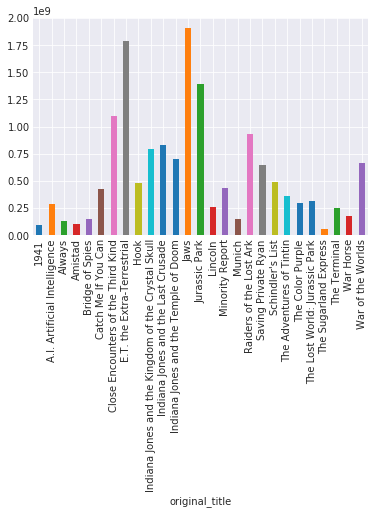

In [294]:
# Let's look at "Steven Spielberg" movies and the mean of their revenue_adj on diagram 
# Movie 'Jaws' has the highest revenue_adj mean
high_revenue.query('director=="Steven Spielberg"').groupby('original_title')['revenue_adj'].mean().plot(kind='bar')

**Find top actors:**

To find top actors, we first separate actor names for each movie and bring them into their own row.

In [295]:
df_high_revenue=high_revenue[['original_title','director','release_year','vote_count','vote_average','revenue_adj','cast']]

df_high_revenue_split_actor=(df_high_revenue.set_index(['original_title','director','release_year','vote_count','vote_average','revenue_adj'])
   .stack()
   .str.split('|', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)
df_high_revenue_split_actor.head()

,original_title,director,release_year,vote_count,vote_average,revenue_adj,cast
0,'71,Yann Demange,2014,274,6.6,1.497553e+06,Jack O'Connell
1,'71,Yann Demange,2014,274,6.6,1.497553e+06,Paul Anderson
2,'71,Yann Demange,2014,274,6.6,1.497553e+06,Sean Harris
3,'71,Yann Demange,2014,274,6.6,1.497553e+06,Sam Reid
4,'71,Yann Demange,2014,274,6.6,1.497553e+06,Sam Hazeldine


In [296]:
#*20* top actors in high revenue movies. 
df_high_revenue_split_actor['cast'].value_counts().head(20)

Robert De Niro        60
Bruce Willis          48
Samuel L. Jackson     48
Nicolas Cage          46
Morgan Freeman        42
Johnny Depp           38
Robin Williams        38
Matt Damon            37
Tom Hanks             37
Sylvester Stallone    37
Liam Neeson           36
Dennis Quaid          36
Brad Pitt             36
Harrison Ford         36
Julianne Moore        36
Denzel Washington     34
Tom Cruise            34
Eddie Murphy          34
Willem Dafoe          33
Gene Hackman          33
Name: cast, dtype: int64

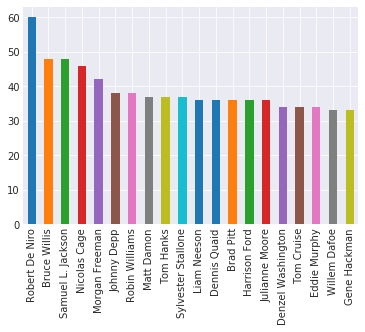

In [297]:
df_high_revenue_split_actor['cast'].value_counts().head(20).plot(kind='bar');

It shows *Robert De Niro* with *60* movies is the top actor. Following him, *Bruce Willis* and *Samuel L. Jackson* come. 

**Find the top production companies:**

In [298]:
df_high_revenue_company=high_revenue[['original_title','director','release_year','vote_average','revenue_adj','production_companies']]

df_high_revenue_split_company=(df_high_revenue_company.set_index(['original_title','director','release_year','vote_average','revenue_adj'])
   .stack()
   .str.split('|', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)
df_high_revenue_split_company.head()

,original_title,director,release_year,vote_average,revenue_adj,production_companies
0,'71,Yann Demange,2014,6.6,1.497553e+06,Screen Yorkshire
1,'71,Yann Demange,2014,6.6,1.497553e+06,British Film Institute (BFI)
2,'71,Yann Demange,2014,6.6,1.497553e+06,Creative Scotland
3,'71,Yann Demange,2014,6.6,1.497553e+06,Film4
4,'71,Yann Demange,2014,6.6,1.497553e+06,Warp Films


In [299]:
df_high_revenue_split_company['production_companies'].describe()

count                  12675
unique                  3926
top       Universal Pictures
freq                     386
Name: production_companies, dtype: object

It shows a bounch of high revenue movies are produced in *Universal Pictures*, *Warner Bros.* and *aramount Pictures* companies.

In [300]:
df_high_revenue_split_company['production_companies'].value_counts().head(10)

Universal Pictures                        386
Warner Bros.                              375
Paramount Pictures                        318
Twentieth Century Fox Film Corporation    226
Columbia Pictures                         203
New Line Cinema                           170
Touchstone Pictures                       139
Metro-Goldwyn-Mayer (MGM)                 137
Walt Disney Pictures                      132
Columbia Pictures Corporation             112
Name: production_companies, dtype: int64

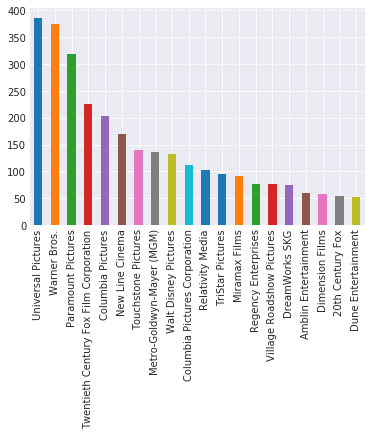

In [301]:
df_high_revenue_split_company['production_companies'].value_counts().head(20).plot(kind='bar');

**Find top genres:**

In [302]:
df_high_revenue_genres=high_revenue[['original_title','director','release_year','vote_average','revenue_adj','genres']]

df_high_revenue_split_genres=(df_high_revenue_genres.set_index(['original_title','director','release_year','vote_average','revenue_adj'])
   .stack()
   .str.split('|', expand=True)
   .stack()
   .unstack(-2)
   .reset_index(-1, drop=True)
   .reset_index()
)
df_high_revenue_split_genres.head()

,original_title,director,release_year,vote_average,revenue_adj,genres
0,'71,Yann Demange,2014,6.6,1.497553e+06,Thriller
1,'71,Yann Demange,2014,6.6,1.497553e+06,Action
2,'71,Yann Demange,2014,6.6,1.497553e+06,Drama
3,'71,Yann Demange,2014,6.6,1.497553e+06,War
4,(500) Days of Summer,Marc Webb,2009,7.3,6.171861e+07,Comedy


In [303]:
df_high_revenue_split_genres['genres'].value_counts()

Drama              2225
Comedy             1732
Thriller           1405
Action             1248
Romance             858
Adventure           832
Crime               770
Science Fiction     583
Horror              553
Family              500
Fantasy             457
Mystery             409
Animation           234
Music               177
History             151
War                 137
Documentary          77
Western              65
Foreign              22
TV Movie              1
Name: genres, dtype: int64

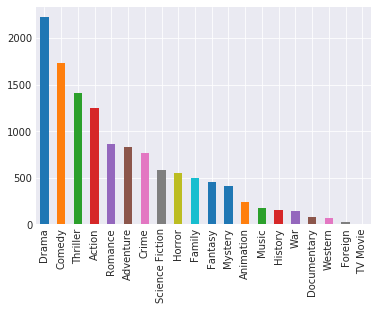

In [304]:
df_high_revenue_split_genres['genres'].value_counts().plot(kind='bar');

*Drama*,*Comedy*,*Thriller*, and *Action* are top genres.   

**Plot relationship between *runtime* and *revenue_adj* output:**

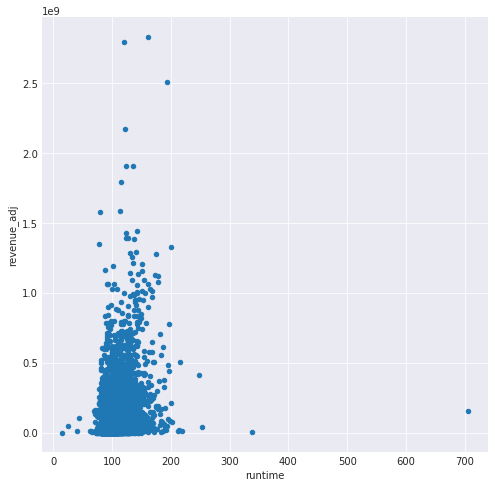

In [305]:
high_revenue.plot(x='runtime', y='revenue_adj', kind='scatter',figsize=(8,8));

In [306]:
high_revenue[['runtime','revenue_adj']].corr()

,runtime,revenue_adj
runtime,1.00000,0.26245
revenue_adj,0.26245,1.00000


It shows the relationship is posetive, but it is a very weak linear correlation. So, runtime doesn not play a key role in making revenue for the movies. 

**Plot relationship between *vote_average* and *revenue_adj* output:**

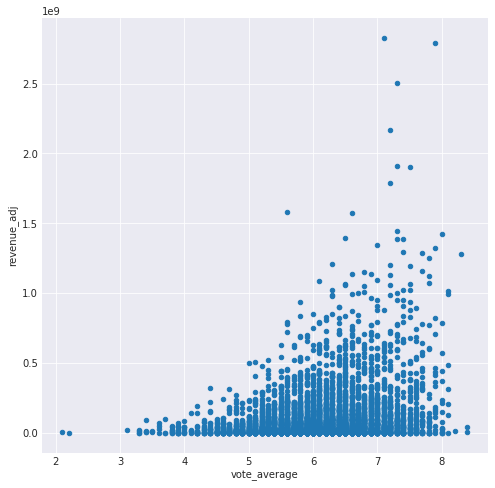

In [307]:
high_revenue.plot(x='vote_average', y='revenue_adj', kind='scatter',figsize=(8,8));

In [308]:
high_revenue[['vote_average','revenue_adj']].corr()

,vote_average,revenue_adj
vote_average,1.000000,0.245138
revenue_adj,0.245138,1.000000


Plot for *vote_average* versus the *revenue_adj* shows that the data are scattered and the correlation is low. Vote_average is not a good predictor for revenue. 

**Plot relationship between *popularity* and *revenue_adj* output:**

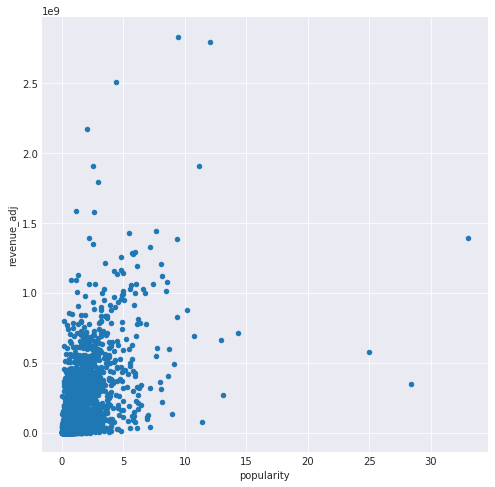

In [309]:
high_revenue.plot(x='popularity', y='revenue_adj', kind='scatter',figsize=(8,8));

In [310]:
high_revenue[['popularity','revenue_adj']].corr()

,popularity,revenue_adj
popularity,1.000000,0.558839
revenue_adj,0.558839,1.000000


In [311]:
high_revenue_removed_popularity_outlier = high_revenue.query('popularity <=15')
high_revenue_removed_popularity_outlier[['popularity','revenue_adj']].corr()

,popularity,revenue_adj
popularity,1.000000,0.602472
revenue_adj,0.602472,1.000000


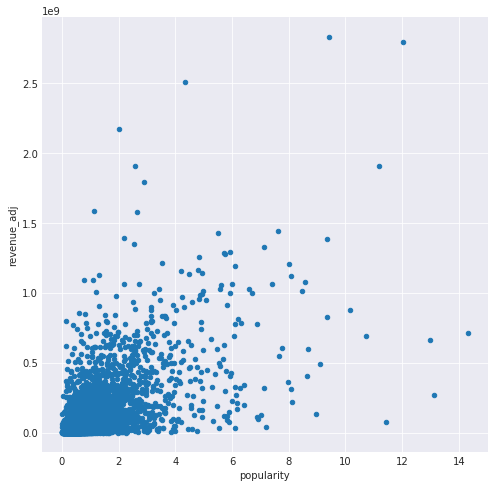

In [312]:
high_revenue_removed_popularity_outlier.plot(x='popularity', y='revenue_adj', kind='scatter',figsize=(8,8));

The correlation and the scatter plot for *popularity* and *revenue_adj* represent the fact that popularity can be a fairly good predictior of how much a movie can make revenue. If we explore the data further and remove three outliers from the popularity data (i.e., popularity > 15), we see that we have a correlation of higher than 0.60 which confirms that popularity is a good predictor of revenue. 

<a id='conclusions'></a>

## Conclusions

In this project, an IMDb dataset was explored to answer two questions regarding the most popular genres and the relationship between high revenue and other variables. We found that the most popular genres were Drama, Comedy, and Action across all the years. Following that, the most popular genres for each year were extracted and populated in a table. 
We found that high-revenue movies are much more popular than low-revenue movies. James Cameron has the highest-grossing movies. Steven Spielberg was found to have the highest number of movies (i.e, 27 movies) among directors. Robert De Niro, with 60 movies have been the top actor. The runtimes of the movies were identified to have no considerable impact on making revenue. The correlation between vote average and the revenue was not strong, either. However, popularity shows to have a good correlation with revenue, which means it may be a good predictor of revenue. 

In [313]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Final.ipynb'])

0